In [2]:
import cv2 
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [3]:
def get_segmented_img(src, num_colors=2):
    
    vector             = src.reshape(-1).astype(np.float32) 
    criteria           = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    _, labels, centers = cv2.kmeans(vector, num_colors, None, criteria, attempts=5, flags=cv2.KMEANS_PP_CENTERS)
    
    labels_w_color  = centers[labels.flatten()] 
    segmented       = labels_w_color.reshape((src.shape)).astype(np.uint8)
    return segmented 

In [4]:
scale_factor = 1/8
path = "imagens/cavalo.jpg"
src = cv2.imread(path, 0)
src_res = cv2.resize(src, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
draw = cv2.putText(src.copy(), Path(path).stem, (0, 40), cv2.FONT_HERSHEY_SIMPLEX, 2, (255), 3)

In [5]:
rows,cols = src.shape
pts1 = np.float32([[10, 100],[200,50],[50,200]])
pts2 = np.float32([[40, 130],[190,70],[50,200]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(src,M,(cols,rows))


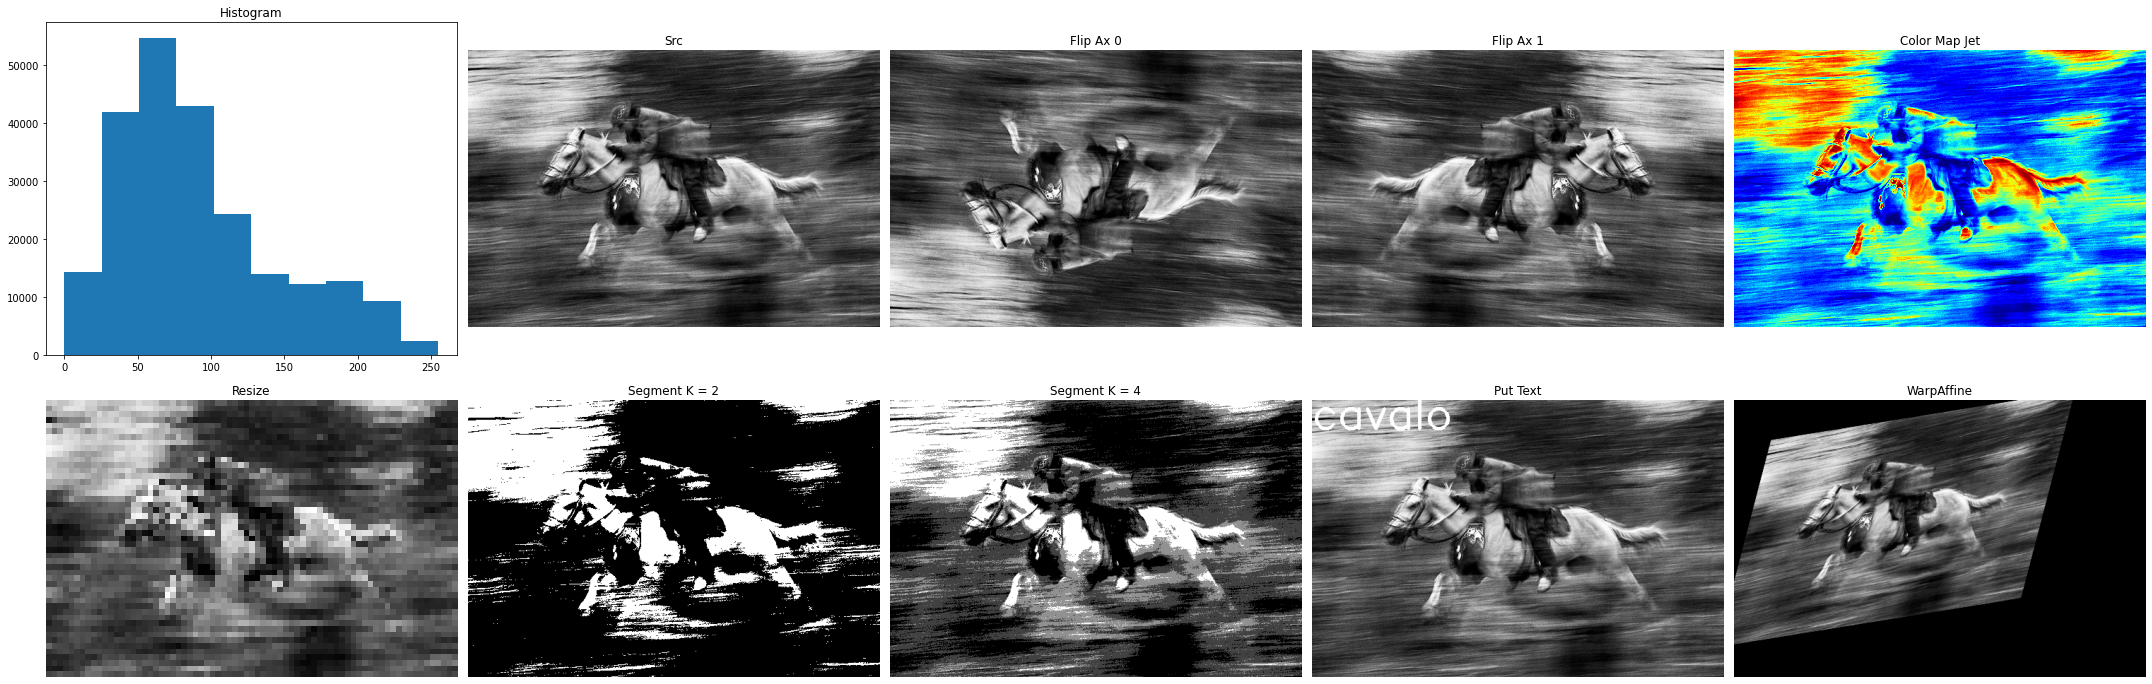

In [8]:
plt.figure(figsize=(30, 10))
plt.subplot(2,5, 1);plt.title("Histogram")#;plt.axis('off')
plt.hist(src.ravel())
plt.subplot(2,5, 2);plt.title("Src");plt.axis('off')
plt.imshow(src, cmap='gray')
plt.subplot(2,5, 3);plt.title("Flip Ax 0");plt.axis('off')
plt.imshow(src[::-1], cmap='gray')
plt.subplot(2,5, 4);plt.title("Flip Ax 1");plt.axis('off')
plt.imshow(src[:, ::-1], cmap='gray')
plt.subplot(2,5, 5);plt.title("Color Map Jet");plt.axis('off')
plt.imshow(src, cmap='jet')

plt.subplot(2,5, 6);plt.title("Resize");plt.axis('off')
plt.imshow(src_res, cmap='gray')
plt.subplot(2,5, 7);plt.title("Segment K = 2");plt.axis('off')
plt.imshow(get_segmented_img(src), cmap='gray')
plt.subplot(2,5, 8);plt.title("Segment K = 4");plt.axis('off')
plt.imshow(get_segmented_img(src, 4), cmap='gray')
plt.subplot(2,5, 9);plt.title("Put Text");plt.axis('off')
plt.imshow(draw, cmap='gray')
plt.subplot(2,5, 10);plt.title("WarpAffine");plt.axis('off')
plt.imshow(dst, cmap='gray')
plt.tight_layout()
plt.savefig("demo.jpg")